In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#GradientTape API
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [3]:
#Second order gradients
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9*time**2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.800000190734863>

In [4]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
 mean=[0, 3],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
 mean=[3, 0],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_samples_per_class)

In [5]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[-0.04242536,  3.0283005 ],
       [-0.7196406 ,  1.921072  ],
       [-0.06501381,  2.4441533 ],
       ...,
       [ 3.1328762 , -0.97915   ],
       [ 2.9205172 , -1.096129  ],
       [ 2.6595895 , -0.41507542]], dtype=float32)

In [6]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

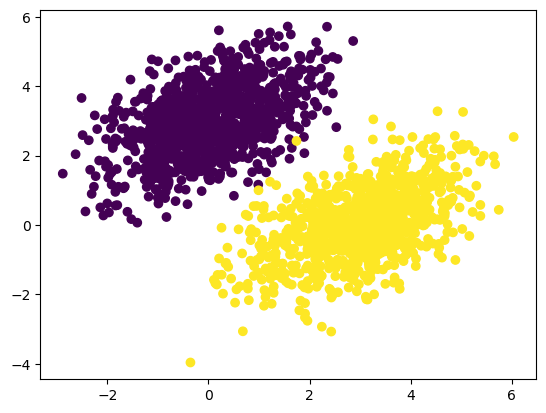

In [9]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [15]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [16]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [19]:
import time
x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [20]:
z

array([[0.84556593, 1.05817675, 1.28402803, ..., 0.75449323, 0.96181295,
        0.88703505],
       [0.85539183, 1.36632006, 0.6352327 , ..., 1.45847585, 0.28899422,
        1.12519531],
       [1.45289009, 1.61401393, 0.33064968, ..., 1.66987793, 1.07171872,
        0.79278374],
       ...,
       [0.62624556, 0.71777951, 1.8682476 , ..., 1.75313591, 0.8475264 ,
        1.1595188 ],
       [1.87526582, 0.8254899 , 0.7323287 , ..., 1.11045527, 1.57468406,
        0.51149837],
       [0.40982513, 1.60954238, 1.2530547 , ..., 1.61144629, 0.71077517,
        1.04634368]])